# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read the locally downloaded dataset from iris.csv file
iris_df = pd.read_csv("iris.csv")

print("Head of iris dataframe to check sanity of data load\n")
print(iris_df.head())

Head of iris dataframe to check sanity of data load

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [126]:
##Use sample method for the same
print("10 random samples\n")
iris_df.sample(n=10)

10 random samples



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
33,34,5.5,4.2,1.4,0.2,Iris-setosa
21,22,5.1,3.7,1.5,0.4,Iris-setosa
41,42,4.5,2.3,1.3,0.3,Iris-setosa
12,13,4.8,3.0,1.4,0.1,Iris-setosa
70,71,5.9,3.2,4.8,1.8,Iris-versicolor
28,29,5.2,3.4,1.4,0.2,Iris-setosa
37,38,4.9,3.1,1.5,0.1,Iris-setosa
121,122,5.6,2.8,4.9,2.0,Iris-virginica
82,83,5.8,2.7,3.9,1.2,Iris-versicolor


In [127]:
##Basic information about the data
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,151.000000,150.000000,150.000000,151.000000
mean,76.500000,5.843709,3.054000,3.758667,1.202649
std,44.022721,0.825314,0.433594,1.764420,0.762185
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.350000,1.300000
75%,114.250000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


In [128]:
##Use info to check the data types and types
iris_df.info()
#There are null/missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [129]:
#Count of missing values across the data frames
iris_df.isna().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

Fill missing values with median of that particular column

In [130]:
#Fill missing data with median values
iris_df.fillna(iris_df.median(),inplace=True)

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [131]:
##Use encoding for the species values to help with modeling KNN
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le_iris = le.fit(iris_df["Species"].unique())
iris_df["Species"] = le_iris.transform(iris_df["Species"])

In [132]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [133]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null int32
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [134]:
iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


In [135]:
#No columns are dropped because as there is good correlation with the target Speicies

#Drop ID column as it will not help with any model building
iris_df.drop("Id",axis=1,inplace=True)

In [136]:
#Do a sanity
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


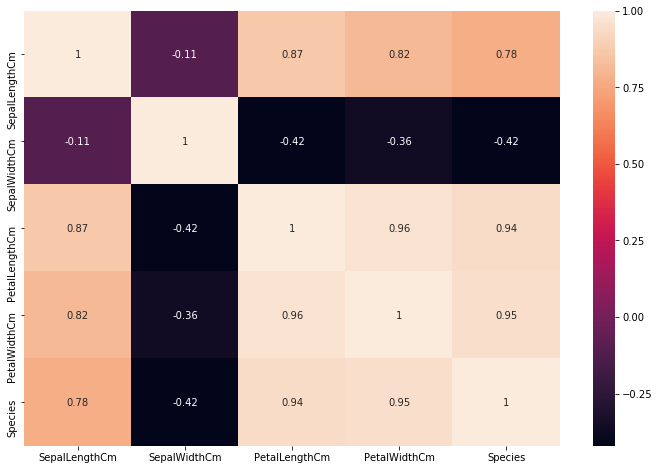

In [137]:
#Verify correlation again using heat map
plt.figure(figsize=(12,8))
sns.heatmap(iris_df.corr(),annot=True)

### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [138]:
#Generate variance to see if there are any lack of variation
iris_df.var() < 0.1
#Np features are being dropped even though SepalWidthcm has less effect overall. We may be able to drop this feature

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [139]:
#Check the correlation among the dependent variables and drop any which may be redundant
iris_df.drop("Species",axis=1).corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000


In [142]:
#PetalLength and PetalWidth are very highly correlated...We only need one..lets drop PetalWidth
iris_df = iris_df.drop("PetalWidthCm",axis=1)
#Check again the correlation
iris_df.drop("Species",axis=1).corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm
SepalLengthCm,1.000000,-0.109369,0.871120
SepalWidthCm,-0.109369,1.000000,-0.420713
PetalLengthCm,0.871120,-0.420713,1.000000


In [143]:
#We could if we had enough features even drop PetalLength or SepalLength since there seems to be strong relation but
#lets retain it for this exercise

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

C:\Users\rejimonr\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rejimonr\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


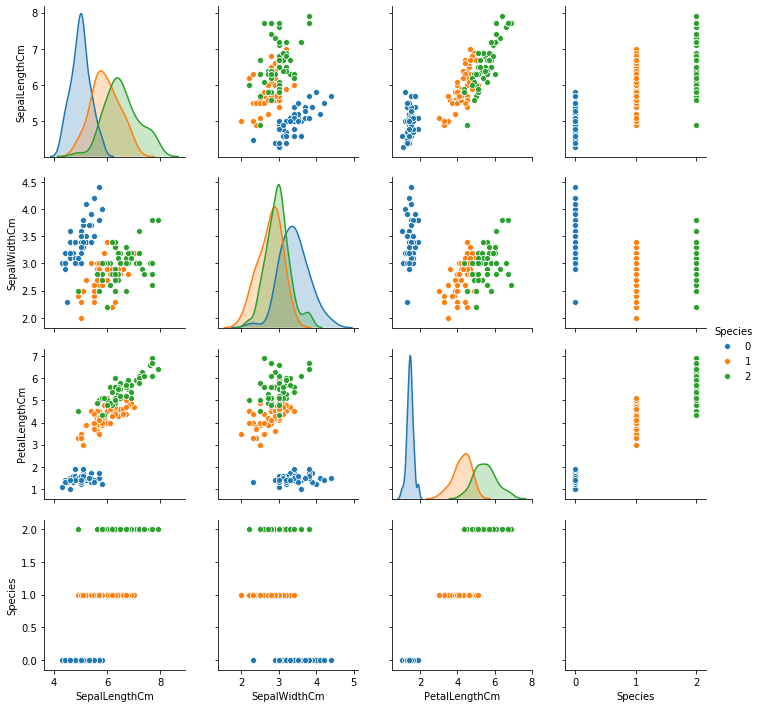

In [144]:
#Scatter plot
#Verify the relation again using pairplot
sns.pairplot(iris_df,diag_kind="kde",hue="Species")

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [145]:
#Split the data into training and test assuming 20% split for test
from sklearn.model_selection import train_test_split

#Seperate the features and targets
X=iris_df.drop("Species",axis=1)
y=iris_df["Species"]

#Check sanity
X.head(),y.head()

#Split by 80/20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)


## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in (3,5,9):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print(f"Accuracy Score for K = {k} is : {accuracy_score(y_test, y_pred)}")

Accuracy Score for K = 3 is : 0.967741935483871
Accuracy Score for K = 5 is : 0.9354838709677419
Accuracy Score for K = 9 is : 0.967741935483871


## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [147]:
accuracy_df = pd.DataFrame(columns=("Kvalue","Accuracy"))


# Calculating error for K values between 1 and 40
for i in range(1, 20,2):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_df = accuracy_df.append({"Kvalue": i, "Accuracy": accuracy_score(y_test, y_pred)},ignore_index=True)
accuracy_df["Kvalue"] = accuracy_df["Kvalue"].astype(int)
print(accuracy_df)
k_opt = int(accuracy_df.iloc[accuracy_df["Accuracy"].argmax()][0])
print("K value with highest accuracy is : ",k_opt)
print("\n")

   Kvalue  Accuracy
0       1  0.870968
1       3  0.967742
2       5  0.935484
3       7  0.967742
4       9  0.967742
5      11  1.000000
6      13  1.000000
7      15  1.000000
8      17  1.000000
9      19  1.000000
K value with highest accuracy is :  11




C:\Users\rejimonr\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  if sys.path[0] == '':


## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

Text(0, 0.5, 'Accuracy %')

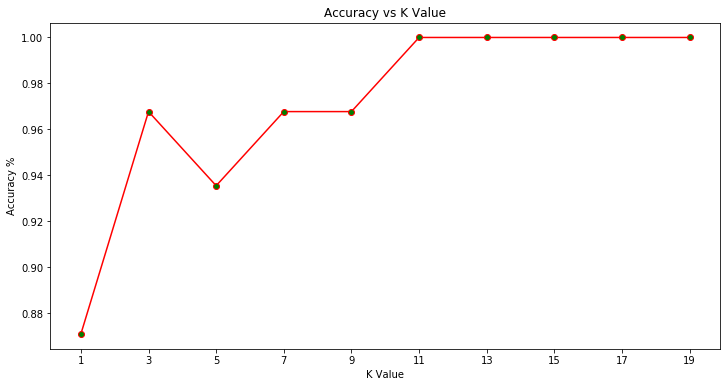

In [148]:
plt.figure(figsize=(12, 6)) 
plt.plot(accuracy_df["Kvalue"], accuracy_df["Accuracy"], color='red',marker='o',  
         markerfacecolor='green')
plt.xticks(accuracy_df["Kvalue"])
plt.title('Accuracy vs K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy %') 

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
##Read the bc2.csv file from local storage
bc_df = pd.read_csv("bc2.csv")
#Do a sanity on read using head
bc_df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [84]:
#Check the basic characteristics of the data
bc_df.shape

(699, 11)

In [85]:
#Get the information on the data using info
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [86]:
#Describe the data
bc_df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Check Missing Values

In [87]:
#Check for missing data...
#From the info we did not observe any null values..
bc_df.isna().sum()
#As expected no null values

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [88]:
#Find out the ? values from the target column Bare Nuclei
print(bc_df["Bare Nuclei"][bc_df["Bare Nuclei"] == "?"].count())

16


#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [89]:
#Replace ? values in Bare Nuclei with the top value of the column
top_value=bc_df["Bare Nuclei"].describe()[2]
print(f'Top value of Bare Nuclei is {top_value} \n')
bc_df["Bare Nuclei"].replace("?",top_value,inplace=True)
#Do a sanity
print(bc_df["Bare Nuclei"][bc_df["Bare Nuclei"] == "?"].count())

Top value of Bare Nuclei is 1 

0


### Question 5
#### Find the distribution of target variable (Class) 

In [90]:
#Distribution of the Class value...use counts
print(bc_df["Class"].value_counts())

2    458
4    241
Name: Class, dtype: int64


In [91]:
bc_df["Class"].unique()

array([2, 4], dtype=int64)

#### Plot the distribution of target variable using histogram

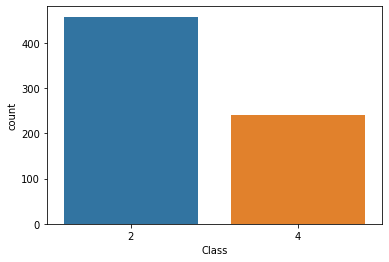

In [92]:
#Histogram of target variable - Class
sns.countplot(bc_df["Class"])

#### Convert the datatype of Bare Nuclei to `int`

In [93]:
bc_df["Bare Nuclei"] = bc_df["Bare Nuclei"].astype("int")

In [94]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int32
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int32(1), int64(10)
memory usage: 57.4 KB


## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

C:\Users\rejimonr\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rejimonr\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


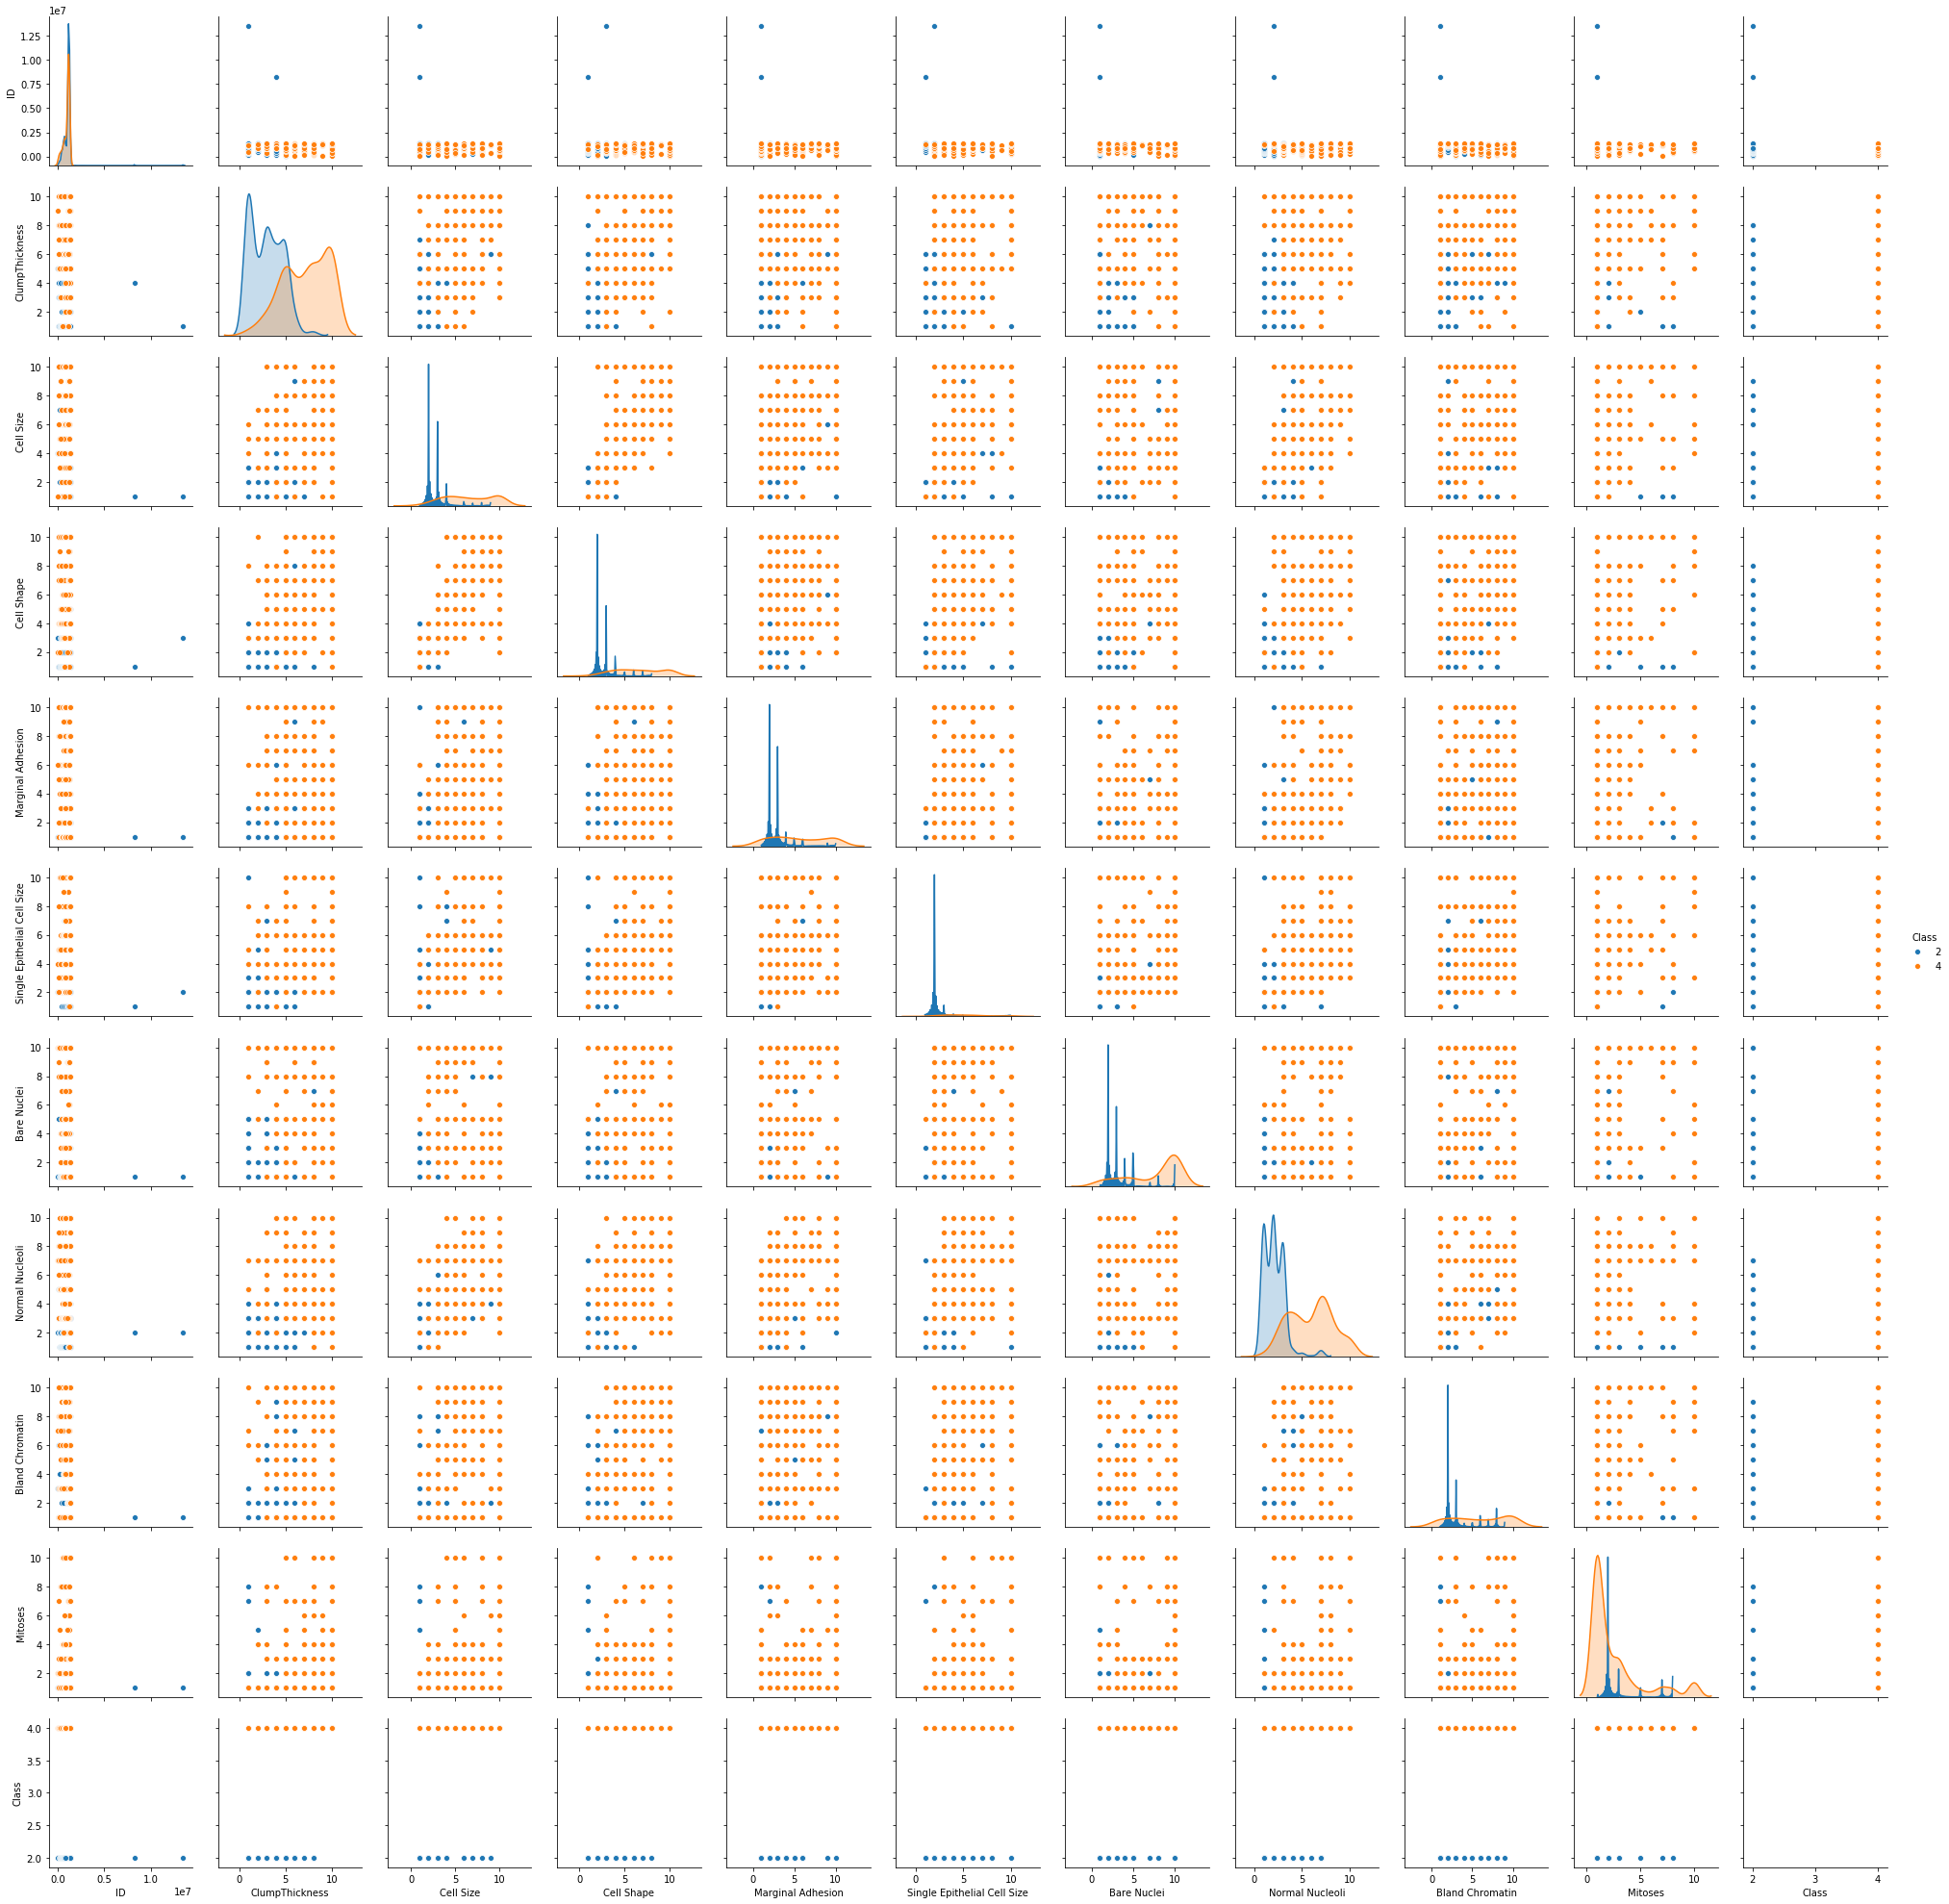

In [95]:
#Use seaborn scatter plot
sns.pairplot(bc_df,diag_kind="kde",hue="Class")

In [96]:
#Use corr to check for high correlation between the features...
bc_df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


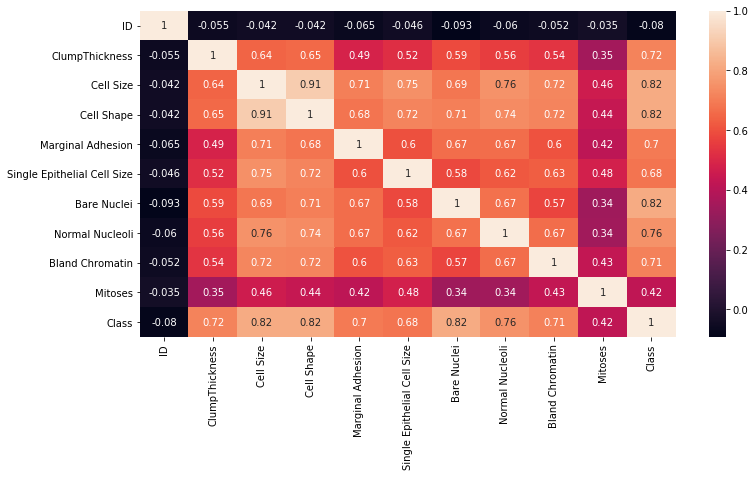

In [97]:
plt.figure(figsize=(12, 6)) 
sns.heatmap(bc_df.corr(),annot=True)

In [98]:
#Cell Size and Cell Shape have high correlation of 0.90 and hence dropping Cell Shape
bc_df.drop("Cell Shape",axis=1,inplace=True)
##Also dropping ID column since it is not adding any characteristics to the model
bc_df.drop("ID",axis=1,inplace=True)
bc_df.head()

,ClumpThickness,Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,2,1,3,1,1,2
1,5,4,5,7,10,3,2,1,2
2,3,1,1,2,2,3,1,1,2
3,6,8,1,3,4,3,7,1,2
4,4,1,3,2,1,3,1,1,2


## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [99]:
#Split the df into features and target
y=bc_df["Class"]
X=bc_df.drop("Class",axis=1)

#Check sanity of X
X.head()

,ClumpThickness,Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,2,1,3,1,1
1,5,4,5,7,10,3,2,1
2,3,1,1,2,2,3,1,1
3,6,8,1,3,4,3,7,1
4,4,1,3,2,1,3,1,1


#### Divide the Training and Test sets in 70:30 

In [100]:
from sklearn.model_selection import train_test_split
#Using sklearn function and using test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in (3,5,9):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print(f"Accuracy Score for K = {k} is : {accuracy_score(y_test, y_pred)}")

Accuracy Score for K = 3 is : 0.9619047619047619
Accuracy Score for K = 5 is : 0.9761904761904762
Accuracy Score for K = 9 is : 0.9666666666666667


## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [103]:
accuracy_df = pd.DataFrame(columns=("Kvalue","Accuracy"))


# Calculating error for K values between 1 and 40
for i in range(1, 20,2):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_df = accuracy_df.append({"Kvalue": i, "Accuracy": accuracy_score(y_test, y_pred)},ignore_index=True)
accuracy_df["Kvalue"] = accuracy_df["Kvalue"].astype(int)
print(accuracy_df)
k_opt = int(accuracy_df.iloc[accuracy_df["Accuracy"].argmax()][0])
print("K value with highest accuracy is : ",k_opt)
print("\n")

   Kvalue  Accuracy
0       1  0.947619
1       3  0.961905
2       5  0.976190
3       7  0.966667
4       9  0.966667
5      11  0.961905
6      13  0.961905
7      15  0.957143
8      17  0.957143
9      19  0.952381
K value with highest accuracy is :  5




C:\Users\rejimonr\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  if sys.path[0] == '':


## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

Text(0, 0.5, 'Accuracy %')

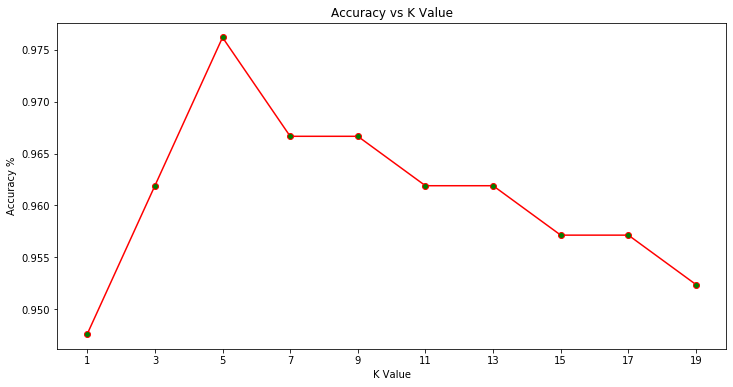

In [104]:
plt.figure(figsize=(12, 6)) 
plt.plot(accuracy_df["Kvalue"], accuracy_df["Accuracy"], color='red',marker='o',  
         markerfacecolor='green')
plt.xticks(accuracy_df["Kvalue"])
plt.title('Accuracy vs K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy %') 